In [1]:
using Multilane
using POMDPToolbox
using POMDPs
using MCTS
using GenerativeModels

In [2]:
nb_lanes = 2
pp = PhysicalParam(nb_lanes,lane_length=200.) #2.=>col_length=8
r_crash = -1.
accel_cost = -1e-5
decel_cost = -5e-6
invalid_cost = -1e-5
lineride_cost = -1e-5
lanechange_cost = -2e-5
_discount = 1.
nb_cars=3
rng = MersenneTwister(1)
rmodel = OriginalRewardModel(r_crash,
                             accel_cost,
                             decel_cost,
                             invalid_cost,
                             lineride_cost,
                             lanechange_cost)
dmodel = IDMMOBILModel(nb_cars, pp)
mdp = OriginalMDP(dmodel, rmodel, _discount);
solver = MCTSSolver(n_iterations=100,
                    depth=10,
                    exploration_constant=1.0,
                   )
policy = solve(solver, mdp)
sim = HistoryRecorder(rng=rng, max_steps=10)
simulate(sim, mdp, policy, initial_state(mdp, rng))

-0.00012000000000000002

Interact.Slider{Int64}(Signal{Int64}(5, nactions=0),"i",5,1:10,true)

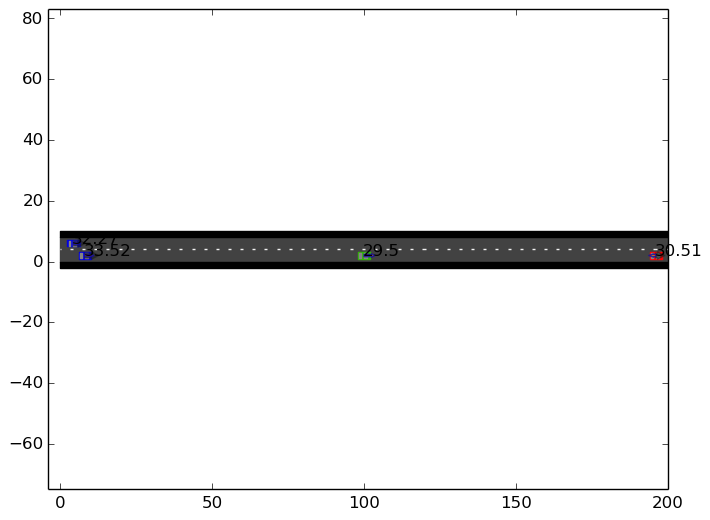

In [3]:
display_sim(mdp, sim.state_hist, sim.action_hist)